In [84]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

In [85]:
def create_linechart(result_fit):
    # Generate a line chart of the training process
    history = result_fit.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(1034, 500, 500, 3)
<class 'numpy.ndarray'>


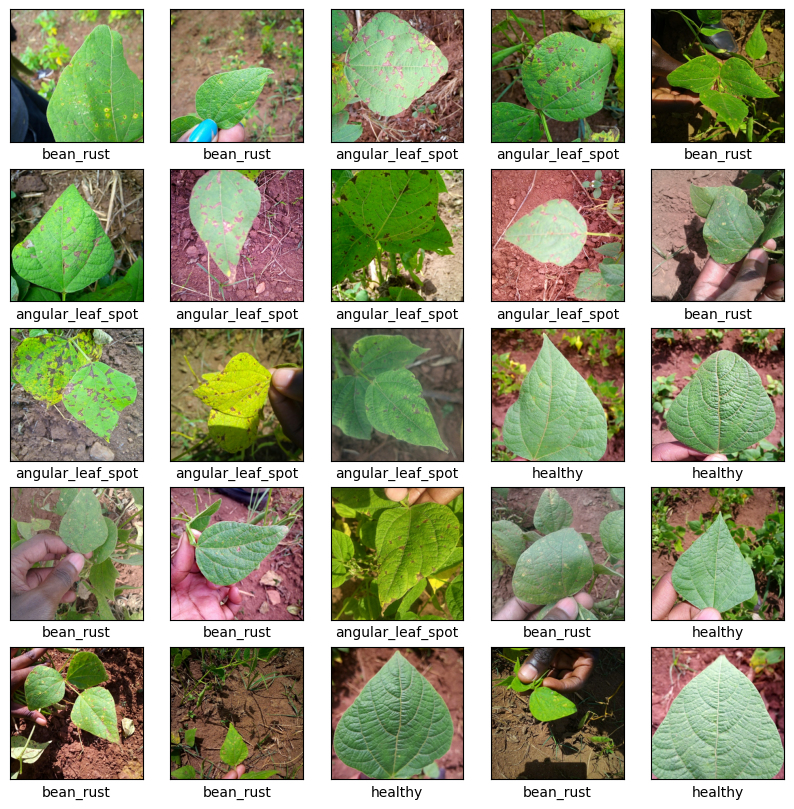

In [86]:
dataset, info = tfds.load("beans", with_info=True)

train_dataset = dataset['train']
train_dataset.image_size=(500, 500),

print(type(train_dataset))
validation_dataset = dataset['validation']
validation_dataset.image_size=(500, 500),
test_dataset = dataset['test']
labelsAsText = ['angular_leaf_spot', 'bean_rust', 'healthy']
trainList = list(train_dataset)
X_train = np.array(list(map(lambda x: x['image'], train_dataset)))
Y_train = np.array(list(map(lambda x: x['label'], train_dataset)))

X_val = np.array(list(map(lambda x: x['image'], validation_dataset)))
Y_val = np.array(list(map(lambda x: x['label'], validation_dataset)))

X_test = np.array(list(map(lambda x: x['image'], test_dataset)))
Y_test = np.array(list(map(lambda x: x['label'], test_dataset)))


print(X_train.shape)
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labelsAsText[Y_train[i]])

print(type(X_train))




In [88]:

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
vals_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
result_fit = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)




test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

Epoch 1/10
17/33 ━━━━━━━━━━━━━━━━━━━━ 10s 655ms/step - accuracy: 0.3621 - loss: 2.9562